
# Pima Indians Diabetes Database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. 

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
                 
<b> Acknowledgement</b> :  This notebook is based on a tutorial by  `Mayank Tripathi @datascience.foundation`


## Import Libaries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
 
import statsmodels.api as sm

## Load Data

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 
             'bmi', 'pedigree', 'age', 'diabetes']

# load dataset

github_path = 'https://raw.githubusercontent.com/huangyh09/foundation-data-science/'
dat_dir = github_path + 'main/w10-classification/'
# dat_dir = './'

pima = pd.read_csv(dat_dir + "diabetes.csv", skiprows=1, names=col_names)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.shape

(768, 9)

In [5]:
pima.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'diabetes'],
      dtype='object')

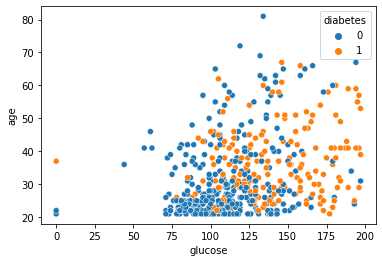

In [6]:
fig = plt.figure()
sns.scatterplot(x="glucose", y="age", 
                data=pima.loc[:500, :], hue="diabetes")
plt.show()

## Selecting Feature
For Features considering all the columns except label, as it is our Target.

In [7]:
feature_cols = ['pregnant', 'glucose', 'bp','skin', 
                'insulin', 'bmi', 'pedigree','age']

X = pima[feature_cols] # Features
y = pima.diabetes      # Target variable

## Splitting into Train and Test

In [8]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [9]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(576, 8)

(576,)

(192, 8)

(192,)

## Train the Model: a first try with all the variables

Here, we use `statsmodels` as it provides more diagnosis statistics.

In [10]:
X_train = sm.add_constant(X_train)
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.482517
         Iterations 6


In [11]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               diabetes   No. Observations:                  576
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            8
Date:                Mon, 08 Nov 2021   Pseudo R-squ.:                  0.2600
Time:                        00:03:05   Log-Likelihood:                -277.93
converged:                       True   LL-Null:                       -375.58
Covariance Type:            nonrobust   LLR p-value:                 6.246e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4218      0.822    -10.240      0.000     -10.034      -6.810
pregnant       0.0869      0.036      2.448      0.014       0.017       0.157
glucose        0.0332      0.004      7.802      0.000       0.025       0.042
bp            -0.0112      0.006     -1.815      0.070      -0.023       0.001
skin           0.0059      0.008      0.728      0.466      -0.010       0.022
insulin       -0.0010      0.001     -1.011      0.312      -0.003       0.001
bmi            0.0880      0.017      5.103      0.000       0.054       0.122
pedigree       0.8935      0.342      2.613      0.009       0.223       1.564
age            0.0220      0.011      2.049      0.040       0.001       0.043
==============================================================================
"""

## Predict with Test Dataset

In [12]:
# Calculate Probability estimates P
X_test = sm.add_constant(X_test)
P_hat_prob = log_reg.predict(X_test) 

# prediction of class with a threshold 0.5
y_pred = (P_hat_prob > 0.5).astype(int)

# y_pred = P_hat_prob.apply(lambda x: 1 if x>0.5 else 0)

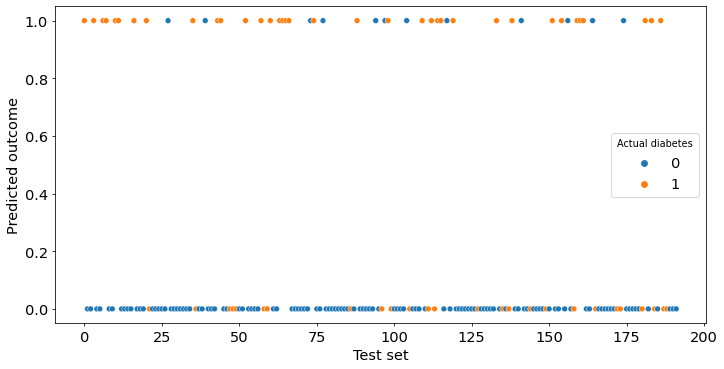

In [13]:
import matplotlib

fig = plt.figure(figsize=(12, 6), dpi=70)
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['legend.fontsize'] = 15
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rcParams['axes.titlesize'] = 17
    
sns.scatterplot(x=np.arange(len(y_pred)), y=y_pred, hue=y_test)
plt.xlabel('Test set')
plt.ylabel('Predicted outcome')
plt.legend(title='Actual diabetes')
plt.show()

## Model Evaluation 

### Confusion Matrix

In [14]:
# cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                         colnames=['Predicted'])
cnf_matrix

Predicted,0,1
Actual,,
0,118,12
1,26,36


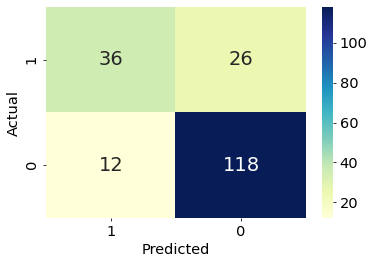

In [15]:
fig = plt.figure(dpi=70)

cnf_matrix = cnf_matrix[[1, 0]].sort_index(ascending=False)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt="d",
           annot_kws={"fontsize": 20})
plt.show()

In [16]:
# think how accuracy is defined
# we can use (TN + TP) / (TN + TP + FN + FP)
# we can also directly compare the proportion of correctness
# we can also use metrics.accuracy_score

# accuracyScore = metrics.accuracy_score(y_test, y_pred)

print('Accuracy: %.4f' %(np.mean(y_test == y_pred)))

Accuracy: 0.8021


In [17]:
metrics.roc_auc_score(y_test, P_hat_prob)

0.8598014888337469

## Model2: New feature set by removing `skin`

In [18]:
feature_cols = ['pregnant', 'glucose', 'bp', 
                'insulin', 'bmi', 'pedigree','age']

X2 = pima[feature_cols] # Features
y = pima.diabetes # Target variable

In [19]:
X2_train, X2_test, y_train, y_test=train_test_split(
    X2, y, test_size=0.25, random_state=0
)

In [20]:
display(X2_train.shape, y_train.shape, X2_test.shape, y_test.shape)

(576, 7)

(576,)

(192, 7)

(192,)

### Train the Model

In [21]:
X2_train = sm.add_constant(X2_train)
log_reg2 = sm.Logit(y_train, X2_train).fit()

Optimization terminated successfully.
         Current function value: 0.482980
         Iterations 6


In [22]:
log_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               diabetes   No. Observations:                  576
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Nov 2021   Pseudo R-squ.:                  0.2593
Time:                        00:03:06   Log-Likelihood:                -278.20
converged:                       True   LL-Null:                       -375.58
Covariance Type:            nonrobust   LLR p-value:                 1.472e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4226      0.823    -10.240      0.000     -10.035      -6.810
pregnant       0.0881      0.035      2.491      0.013       0.019       0.157
glucose        0.0327      0.004      7.823      0.000       0.025       0.041
bp            -0.0104      0.006     -1.714      0.087      -0.022       0.001
insulin       -0.0007      0.001     -0.775      0.438      -0.003       0.001
bmi            0.0921      0.016      5.621      0.000       0.060       0.124
pedigree       0.9124      0.342      2.668      0.008       0.242       1.583
age            0.0207      0.011      1.961      0.050    9.63e-06       0.041
==============================================================================
"""

### Predict with Test Dataset

In [23]:
# Calculate Probability estimates P
X2_test = sm.add_constant(X2_test)
P_hat_prob2 = log_reg2.predict(X2_test) 

# prediction of class with a threshold 0.5

y_pred2 = (P_hat_prob2 > 0.5).astype(int)

In [24]:
cnf_matrix2 = pd.crosstab(
    y_test, y_pred2, rownames=['Actual'], colnames=['Predicted']
)
cnf_matrix2

Predicted,0,1
Actual,,
0,118,12
1,25,37


In [25]:
accuracyScore = metrics.accuracy_score(y_test, y_pred2)
print('Accuracy Score : ',accuracyScore)
print("Accuracy In Percentage : %5.2f%c" %  (accuracyScore*100,'%'))

Accuracy Score :  0.8072916666666666
Accuracy In Percentage : 80.73%


In [26]:
metrics.roc_auc_score(y_test, P_hat_prob2)

0.8612903225806452

## Model3: New feature set by removing `skin` and `insulin`

In [27]:
feature_cols = ['pregnant', 'glucose', 'bp', 'bmi', 'pedigree','age']
X3 = pima[feature_cols] # Features
y = pima.diabetes # Target variable

In [28]:
X3_train, X3_test, y_train, y_test=train_test_split(
    X3, y, test_size=0.25, random_state=0
)

In [29]:
display(X3_train.shape, y_train.shape, X3_test.shape, y_test.shape)

(576, 6)

(576,)

(192, 6)

(192,)

### Train the Model 

In [30]:
X3_train = sm.add_constant(X3_train)
log_reg3 = sm.Logit(y_train, X3_train).fit()

Optimization terminated successfully.
         Current function value: 0.483499
         Iterations 6


In [31]:
log_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               diabetes   No. Observations:                  576
Model:                          Logit   Df Residuals:                      569
Method:                           MLE   Df Model:                            6
Date:                Mon, 08 Nov 2021   Pseudo R-squ.:                  0.2585
Time:                        00:03:06   Log-Likelihood:                -278.50
converged:                       True   LL-Null:                       -375.58
Covariance Type:            nonrobust   LLR p-value:                 3.304e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3490      0.815    -10.247      0.000      -9.946      -6.752
pregnant       0.0886      0.035      2.510      0.012       0.019       0.158
glucose        0.0317      0.004      8.011      0.000       0.024       0.039
bp            -0.0105      0.006     -1.736      0.083      -0.022       0.001
bmi            0.0909      0.016      5.594      0.000       0.059       0.123
pedigree       0.8810      0.340      2.593      0.010       0.215       1.547
age            0.0219      0.010      2.091      0.037       0.001       0.042
==============================================================================
"""

### Predict with Test Dataset

In [32]:
# Calculate Probability estimates P
X3_test = sm.add_constant(X3_test)
P_hat_prob3 = log_reg3.predict(X3_test) 

# prediction of class with a threshold 0.5

y_pred3 = P_hat_prob3.apply(lambda x: 1 if x>0.5 else 0)

In [33]:
# cnf_matrix3 = metrics.confusion_matrix(y_test, y_pred3)
cnf_matrix3 = pd.crosstab(
    y_test, y_pred3, rownames=['Actual'], colnames=['Predicted']
)

cnf_matrix3

Predicted,0,1
Actual,,
0,117,13
1,26,36


In [34]:
accuracyScore = metrics.accuracy_score(y_test, y_pred3)
print('Accuracy Score : ',accuracyScore)
print("Accuracy In Percentage : %5.2f%c" %  (accuracyScore*100,'%'))

Accuracy Score :  0.796875
Accuracy In Percentage : 79.69%


In [35]:
metrics.roc_auc_score(y_test, P_hat_prob3)

0.8598014888337469